In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1=pd.read_csv('./data/서울시 인구현황_구.txt', sep='\t', header=1)
df1=df1.iloc[:, [0,1,3,4,5,6,7,8,9,10,11,-1]]
df1.drop(0, inplace=True)

In [3]:
col_name=['년도', '자치구', '총인구', '총인구(남)', '총인구(여)', '내국인', '내국인(남)', '내국인(여)',
          '외국인', '외국인(남)','외국인(여)', '65세이상']

In [4]:
for i in range(len(col_name)):
    df1.rename(columns={df1.columns[i]:col_name[i]}, inplace=True)

In [5]:
df2=df1.iloc[:, [0,1,2,5,8,11]]

for row_i in df2.index:
    df2.loc[row_i, "총인구"]=df2.loc[row_i, "총인구"].replace(",","")
    df2.loc[row_i, "내국인"]=df2.loc[row_i, "내국인"].replace(",", "")
    df2.loc[row_i, "외국인"]=df2.loc[row_i, "외국인"].replace(",", "")
    df2.loc[row_i, "65세이상"]=df2.loc[row_i, "65세이상"].replace(",", "")

C:\Users\wooky\.conda\envs\multi\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\wooky\.conda\envs\multi\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [6]:
df2=df2[df2['내국인'] != "…"]  # 1991년 데이터 제거

df2=df2.astype({'총인구':int, '내국인':int,'외국인':int,'65세이상':int})
print(df2.dtypes)

년도       object
자치구      object
총인구       int32
내국인       int32
외국인       int32
65세이상     int32
dtype: object


In [7]:
import matplotlib.font_manager as fm
font_name=fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=font_name)

In [8]:
gu=input('조회 구이름 입력: ')
df3=df2[df2['자치구'] == gu]

조회 구이름 입력: 강동


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

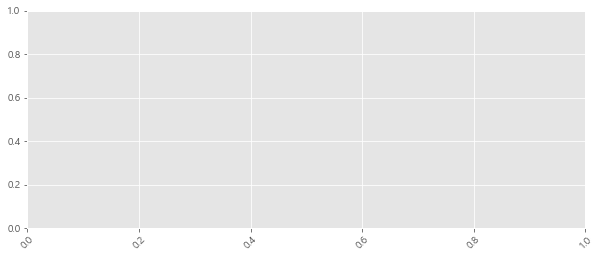

In [9]:
plt.figure(figsize=(10, 4))
plt.style.use('ggplot')
plt.xticks(size=10, rotation=45)


C:\Users\wooky\.conda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wooky\.conda\envs\multi\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


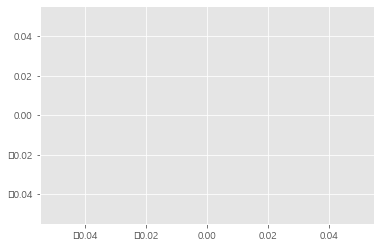

In [10]:
plt.plot(df3['년도'], df3['내국인'], marker='o', markersize=5, label='내국인')
plt.plot(df3['년도'], df3['외국인'], marker='o', markersize=5, label='외국인')
plt.plot(df3['년도'], df3['65세이상'], marker='o', markersize=5, label='65세이상')

No handles with labels found to put in legend.


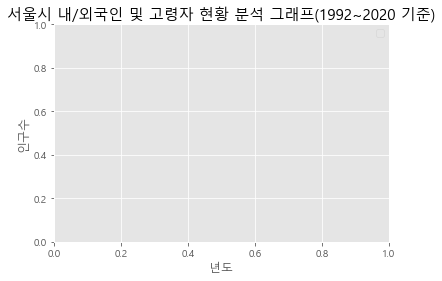

In [11]:
plt.legend()
plt.title('서울시 내/외국인 및 고령자 현황 분석 그래프(1992~2020 기준)', size=15)
plt.xlabel('년도')
plt.ylabel('인구수')

plt.show()
